In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from numba import njit
import scipy.linalg
from mpmath import *

font = {'weight' : 'bold',
        'size'   : 30}

plt.rc('font', **font)

# Explicit scheme

In [11]:
Nt = 1
Nh = 10
t_max = 0.0001

# @njit
def explicit(t, Nt, omega0, B = 0.):
    Nh = np.shape(omega0)[0] - 1
    tau = t/Nt
    ksi = np.linspace(0, 1, Nh+1).astype("float64")
    h = ksi[1] - ksi[0]
    omega = np.copy(omega0)
    gamma = 0.1
    v = omega[-2]**2*omega[-3]/gamma/2/h
    gammaArr = np.zeros(Nt+2)
    gammaArr[0] = gamma
    psiArr = np.zeros(Nt+2)
    psiArr[0] = -((omega[0] + omega[1])/2)**3/gamma*((omega[1] - omega[0])/h - gamma*B)
    for k in range(Nt + 1):
        print(k)
        omega[1:Nh] = omega[1:Nh] + tau*((1/gamma*v*ksi[1:Nh])*(omega[2:Nh+1] - omega[1:Nh])/h - 
                                        1/gamma/h * ( -(omega[2:Nh+1] + omega[1:Nh])**3/8/gamma * ((omega[2:Nh+1] - omega[1:Nh])/h - gamma * B) + 
                                                    (omega[0:Nh-1] + omega[1:Nh])**3/8/gamma * ((omega[1:Nh] - omega[0:Nh-1])/h - gamma * B)))
        v = -(omega[Nh-1])**2/gamma*((omega[Nh] - omega[Nh-2])/2/h - gamma*B)
        gamma = gamma + tau*v
        gammaArr[k+1] = gamma
        psiArr[k+1] = -((omega[0] + omega[1])/2)**3/gamma*((omega[1] - omega[0])/h - gamma*B)
#     print(v)
    return ksi, omega, gammaArr, psiArr

def analytical(N):
    omega0 = np.array([])
    ksi = np.linspace(0, 1, N+1).astype("float64")
    for x in ksi:
        o = 0.
        for i in range(10):
            o += a[i]*(1-x**2)**(1/3)*gegenbauer(2*(i+1) -2, 5/6, x)
        o += b_0*(1-x)
        omega0 = np.append(omega0, o)
    return omega0

a = np.array([0.73658, 3.22225e-2, 0.28157e-2, 0.20421e-2, 0.79333e-3, 0.58367e-3, 0.27394e-3, 0.17645e-3, 0.64422e-4, 0.33006e-4])
b_0 = 0.28924
omega0 = analytical(Nh)
# omega0
# omega0.shape
ksi, omega1, gammaArr1, psiArr1 = explicit(t_max, Nt, omega0.astype("float64"), 0.)
# plt.plot(ksi, omega1)
# plt.plot(ksi, omega0)
# plt.show()
# _, omegaB, gammaArrB, psiArrB = explicit(t_max, Nt, omega0.astype("float64"), 0.)
# _, omegam1, gammaArrm1, psiArrm1 = explicit(t_max, Nt, omega0.astype("float64"), -1.)

0
1


In [12]:
omega1

array([0.9998899 , 0.96940806, 0.93593294, 0.89873923, 0.85699644,
       0.80934118, 0.75364061, 0.68609828, 0.59719129, 0.45299006,
       0.        ])

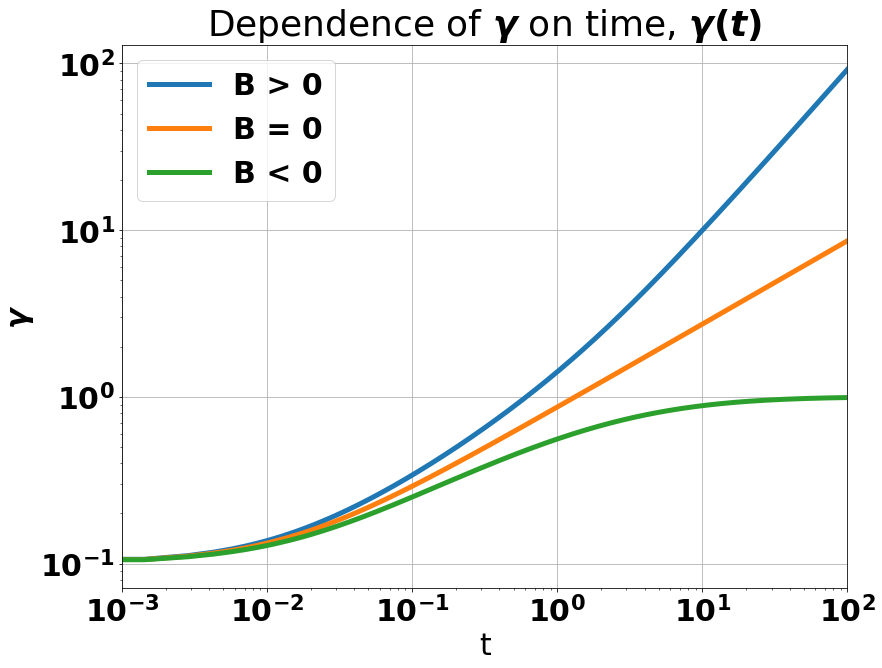

In [15]:
fig1 = plt.figure(figsize = (13, 10))
t_arr = np.linspace(0., t_max, Nt+1)[0::1000]
plt.plot(t_arr, gammaArr1[0::1000], label = "B > 0", lw = 5)
plt.plot(t_arr, gammaArrB[0::1000], label = "B = 0", lw = 5)
plt.plot(t_arr, gammaArrm1[0::1000], label = "B < 0", lw = 5)
plt.title("Dependence of $\gamma$ on time, $\gamma(t)$")
plt.ylabel("$\gamma$")
plt.xlabel("t")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim([1e-3, 100.])
plt.grid()
fig1.savefig('imagesProject/gamma.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

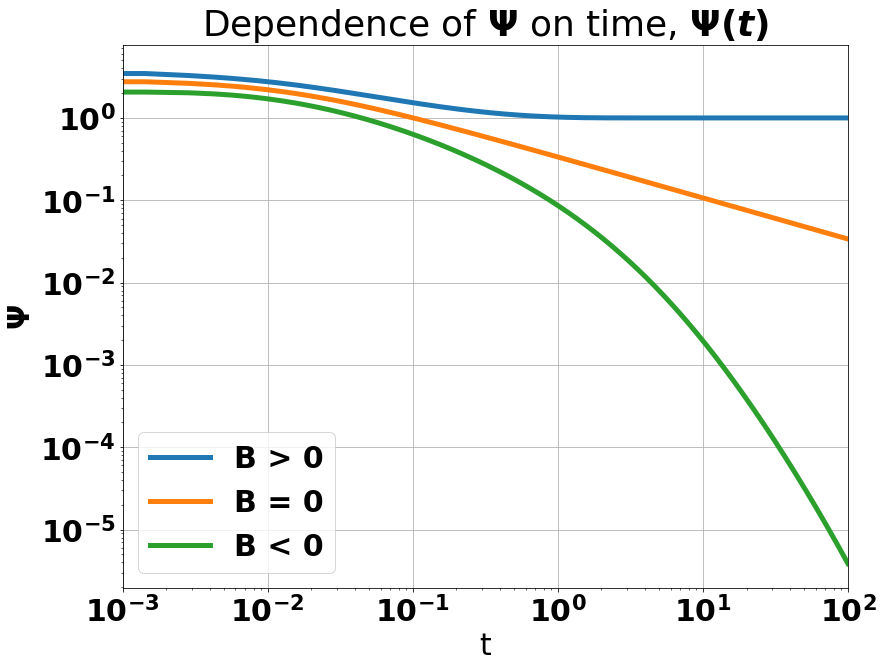

In [17]:
fig2 = plt.figure(figsize = (13, 10))
t_arr = np.linspace(0., t_max, Nt+1)[0::1000]
plt.plot(t_arr, psiArr1[0::1000], label = "B > 0", lw = 5)
plt.plot(t_arr, psiArrB[0::1000], label = "B = 0", lw = 5)
plt.plot(t_arr, psiArrm1[0::1000], label = "B < 0", lw = 5)
plt.title("Dependence of $\Psi$ on time, $\Psi(t)$")
plt.ylabel("$\Psi$")
plt.xlabel("t")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim([1e-3, 100.])
plt.grid()
fig2.savefig('imagesProject/psi.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

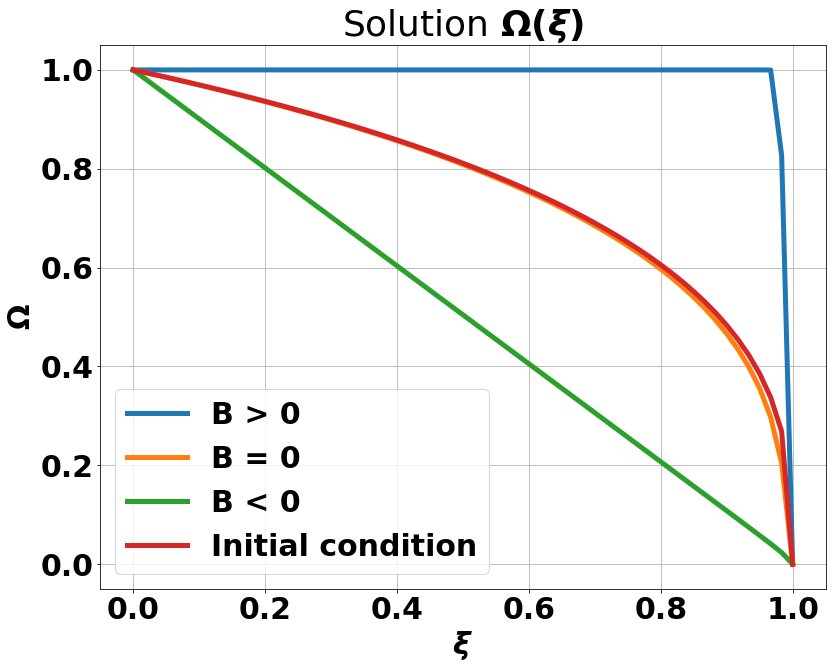

In [21]:
fig2 = plt.figure(figsize = (13, 10))
plt.plot(ksi, omega1, label = "B > 0", lw = 5)
plt.plot(ksi, omegaB, label = "B = 0", lw = 5)
plt.plot(ksi, omegam1, label = "B < 0", lw = 5)
plt.plot(ksi, omega0, label = "Initial condition", lw = 5)
plt.title("Solution $\Omega(\\xi)$")
plt.ylabel("$\Omega$")
plt.xlabel("$\\xi$")
plt.legend()
plt.grid()
fig2.savefig('imagesProject/Omega.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

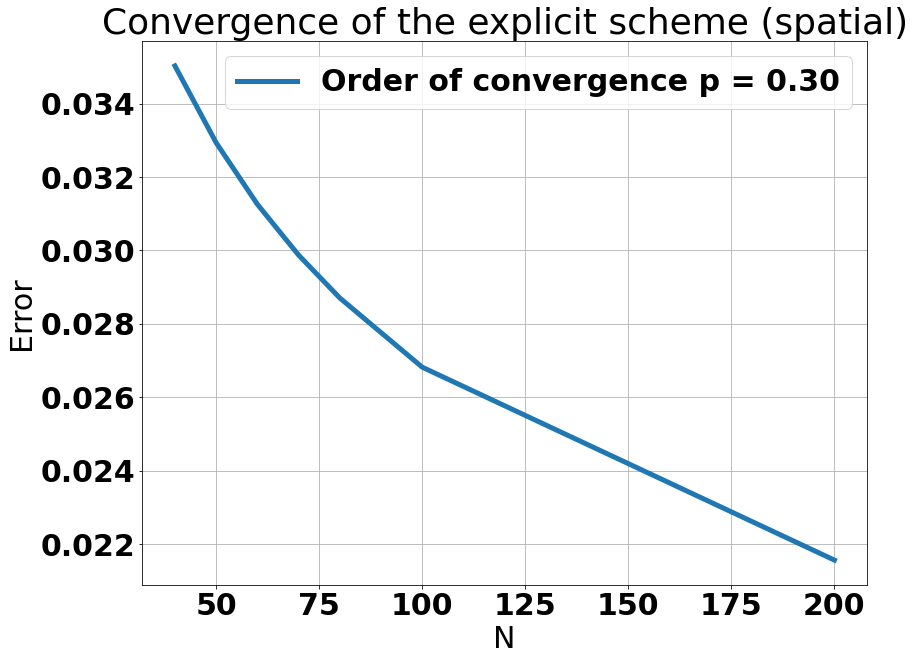

In [30]:
t_max = 0.01
Nt = 320000
Nh = 32
Nhs = np.array([40, 50, 60, 70, 80, 100, 200])
Nts = Nhs * 10000
error = np.array([])
for i in range(len(Nhs)):
    error = np.append(error, np.max(np.abs(explicit(t_max, Nts[i], analytical(Nhs[i]).astype("float64"), 0.)[1] - 
                                           explicit(t_max, Nts[i], analytical(2*Nhs[i]).astype("float64"), 0.)[1][0::2])))
fig2 = plt.figure(figsize = (13, 10))
plt.plot(Nhs, error, lw = 5, 
         label = "Order of convergence p = {:.2f}".format(-np.polyfit(np.log(Nhs), np.log(error), 1)[0]))
plt.title("Convergence of the explicit scheme (spatial)")
plt.ylabel("Error")
plt.xlabel("N")
plt.grid()
plt.legend()
fig2.savefig('imagesProject/convSpatial.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

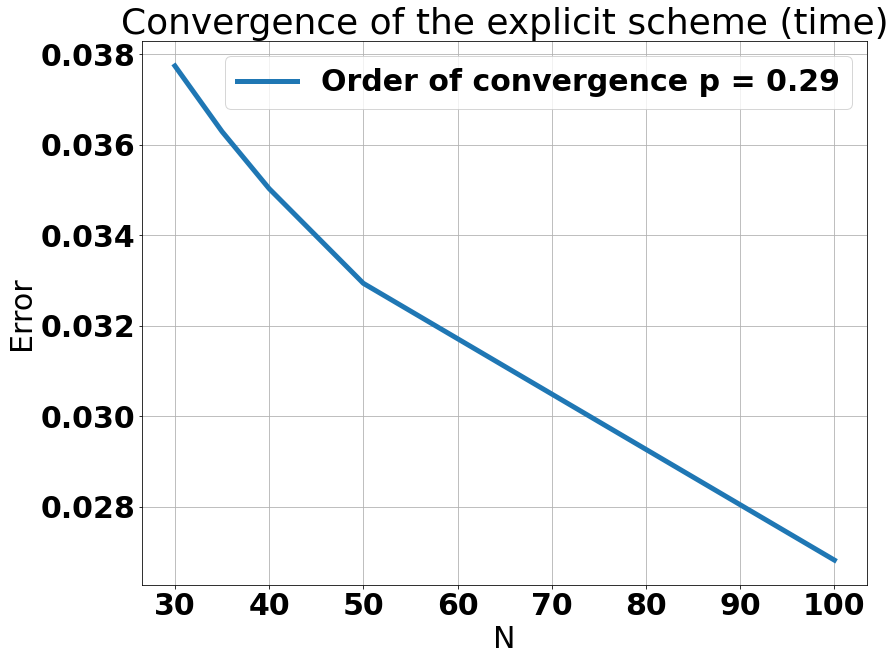

In [16]:
t_max = 0.01
Nt = 320000
Nh = 50
Nhs = np.array([60, 70, 80, 100, 200], dtype = int)//2
Nts = Nhs * 10000
error = np.array([])
for i in range(len(Nhs)):
    error = np.append(error, np.max(np.abs(explicit(t_max, Nts[i], analytical(Nhs[i]).astype("float64"), 0.)[1] - 
                                           explicit(t_max, 2*Nts[i], analytical(2*Nhs[i]).astype("float64"), 0.)[1][0::2])))
fig2 = plt.figure(figsize = (13, 10))
plt.plot(Nhs, error, lw = 5, 
         label = "Order of convergence p = {:.2f}".format(-np.polyfit(np.log(Nhs), np.log(error), 1)[0]))
plt.title("Convergence of the explicit scheme (time)")
plt.ylabel("Error")
plt.xlabel("N")
plt.grid()
plt.legend()
fig2.savefig('imagesProject/convTime.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

# Implicit scheme

2.1057111224172953
1.0604363651269286


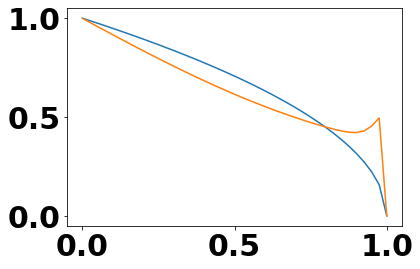

In [20]:
Nt = 500000
Nh = 30

# @njit
def implicit(t):
    global Nt, Nh
    tau = t/Nt
    ksi = np.linspace(0, 1, Nh+1).astype("float64")
    h = ksi[1] - ksi[0]
    omega = np.sqrt(1-ksi)
    gamma = 0.1
    v = omega[-2]**2*omega[-3]/gamma/2/h
    for k in range(Nt):
        A = np.zeros(Nh - 1)
        for i in range(1, Nh):
            A[i, i] = 1.
            A[i, i+1] = -tau*v*ksi
#         A = np.array([np.append([0], tau*v/2/h/gamma * ksi[2:Nh]),
#                      np.ones(Nh-1),
#                      np.append(-tau*v/2/h/gamma * ksi[1:Nh-1], [0])])
        b = omega[1:Nh] + tau*(-1/gamma/h * ( -(omega[2:Nh+1] + omega[1:Nh])**3/8/gamma * ((omega[2:Nh+1] - omega[1:Nh])/h) + 
                                                    (omega[0:Nh-1] + omega[1:Nh])**3/8/gamma * ((omega[1:Nh] - omega[0:Nh-1])/h)))
        b[0] -= tau*v*ksi[1]/2/h/gamma
        omega = np.append(np.append([1.], scipy.linalg.solve_banded((1, 1), A, b)), [0.])
        v = -(omega[Nh-1])**2/gamma*((omega[Nh] - omega[Nh-2])/2/h)
        gamma = gamma + tau*v
    print(gamma)
    print(v)
    return ksi, omega
    
ksi, omega = implicit(1.)
plt.plot(ksi, np.sqrt(1-ksi))
plt.plot(ksi, omega)
plt.show()

In [ ]:
a = [0.73658, 3.22225e-2, 0.28157e-2, 0.20421e-2, 0.79333e-3, 0.58367e-3, 0.27394e-3, 0.17645e-3, 0.64422e-4, 0.33006e-4]

b_0 = 0.28924
omega_ksi = []
for ksi in np.linspace(0.0,1,100):
    omega = 0
    for i in range(10):
        omega += a[i]*(1-ksi**2)**(1/3)*gegenbauer(2*(i+1) -2, 5/6, ksi)
    omega+=b_0*(1-ksi)
    omega_ksi.append(omega)
plt.plot(np.linspace(0.0,1,100), omega_ksi)
plt.plot()